<a href="https://colab.research.google.com/github/Love1117/Machine_learning-Projects/blob/main/Machine_Learning%20Project/03_Deep%20Learning%20Projects/Artificial%20Neural%20Network%20(ANN)/ANN%20for%20Regression/Energy%20consumption%20prediction/Smart_home_EnergyConsumption_Prediction1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

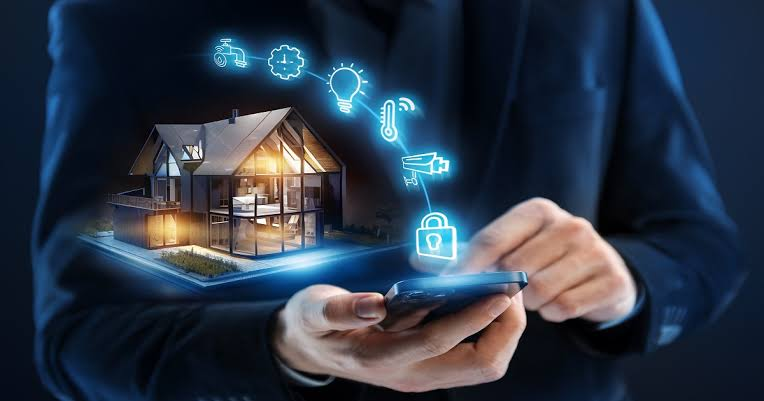
#**⚡Smart Home Energy Consumption Prediction using Artificial Neural Network (ANN)**

##**📘 Project Summary:**
This project uses a Deep Learning Artificial Neural Network (ANN) to predict energy consumption in a smart home environment. The model analyzes historical data such as temperature, season, appliance type, Date, time-based factors and Houseshold_size to learn complex patterns that influence energy usage.

Through effective training and tuning, the ANN achieved strong predictive results with:

R² Score: 0.75

Mean Squared Error (MSE): 0.3389

Mean Absolute Error (MAE): 0.4732


These results show that the model accurately captures nonlinear relationships between household conditions and energy usage, making it reliable for real-world energy forecasting and optimization.

##**🎯 Aim of the Project:**
The main aim of this project is to develop an intelligent model that predicts future energy consumption in smart homes. This helps homeowners and energy providers to:

Monitor and manage energy usage efficiently

Identify consumption patterns and peak usage hours

Reduce unnecessary energy costs

Support sustainability and smart grid initiatives


##**Data Loading and exploration**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import pandas as pd
import numpy as np
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/smart_home.csv")
pd.set_option("display.max_columns", None)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Home ID,Appliance Type,Energy Consumption (kWh),Time,Date,Outdoor Temperature (°C),Season,Household Size
0,94,Fridge,0.20,21:12,2023-12-02,-1.0,Fall,2
1,435,Oven,0.23,20:11,2023-08-06,31.1,Summer,5
2,466,Dishwasher,0.32,06:39,2023-11-21,21.3,Fall,3
3,496,Heater,3.92,21:56,2023-01-21,-4.2,Winter,1
4,137,Microwave,0.44,04:31,2023-08-26,34.5,Summer,5
...,...,...,...,...,...,...,...,...
99995,124,Microwave,0.42,09:56,2023-09-28,20.5,Summer,1
99996,184,Computer,0.71,12:48,2023-05-27,-5.4,Spring,2
99997,101,Dishwasher,0.25,05:45,2023-02-18,35.6,Winter,3
99998,423,Air Conditioning,2.69,12:39,2023-04-20,3.7,Spring,1


In [ ]:
#Checking to see if there is duplicates or Null values
print(f"Null_values: {df.isna().sum()}")
print("\n")
print(f"Duplicate values: {df.duplicated().sum()}")

Null_values: Home ID                     0
Appliance Type              0
Energy Consumption (kWh)    0
Time                        0
Date                        0
Outdoor Temperature (°C)    0
Season                      0
Household Size              0
dtype: int64


Duplicate values: 0


##**Feature Engineering**

In [ ]:
#merging Date and Timestamp features
df["Timestamp"] = df["Date"] + " " + df["Time"]

#converting Timestamp from string to Timestamptime
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")

#extracting year, month, day, day's of the week, hour and weekend from Timestamp
df["Year"] = pd.to_datetime(df["Timestamp"]).dt.year
df["Month"] = pd.to_datetime(df["Timestamp"]).dt.month
df["Day"] = pd.to_datetime(df["Timestamp"]).dt.day
df["Days Of The Week"] = pd.to_datetime(df["Timestamp"]).dt.day_of_week
df["Hour"] = pd.to_datetime(df["Timestamp"]).dt.hour
df["Weekend"] = (df["Timestamp"].dt.day_of_week >= 5).astype(int)

#converting categorical columns to onehotencoding
df = pd.get_dummies(df, drop_first=True, columns=["Appliance Type","Season"], dtype=int)

#dropping unused columns
df = df.drop(columns=["Home ID","Time","Date","Timestamp"])

df.head()

,Energy Consumption (kWh),Outdoor Temperature (°C),Household Size,Year,Month,Day,Days Of The Week,Hour,Weekend,Appliance Type_Computer,Appliance Type_Dishwasher,Appliance Type_Fridge,Appliance Type_Heater,Appliance Type_Lights,Appliance Type_Microwave,Appliance Type_Oven,Appliance Type_TV,Appliance Type_Washing Machine,Season_Spring,Season_Summer,Season_Winter
0,0.20,-1.0,2,2023,12,2,5,21,1,0,0,1,0,0,0,0,0,0,0,0,0
1,0.23,31.1,5,2023,8,6,6,20,1,0,0,0,0,0,0,1,0,0,0,1,0
2,0.32,21.3,3,2023,11,21,1,6,0,0,1,0,0,0,0,0,0,0,0,0,0
3,3.92,-4.2,1,2023,1,21,5,21,1,0,0,0,1,0,0,0,0,0,0,0,1
4,0.44,34.5,5,2023,8,26,5,4,1,0,0,0,0,0,1,0,0,0,0,1,0


##**Create input features and target variable**

In [ ]:
 x = df.drop(columns=["Energy Consumption (kWh)"]) # Features
 y = df["Energy Consumption (kWh)"] # Target

##**Model Preparation: Spliting into train/test sets to evaluate performance.**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

##**Scaling features Using StandardScaler**

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train = pd.DataFrame(scale.fit_transform(x_train), columns=x.columns)
x_test = pd.DataFrame(scale.fit_transform(x_test), columns=x.columns)

##**Model Building: training ANN (Deep Learning) Model**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

ANN = Sequential([
      Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
          Dense(64, activation='relu'),
              Dense(32, activation='relu'),
                  Dense(1, activation='linear')
                  ])
ANN.compile(optimizer="adam", loss="mean_squared_error", metrics=["mae"]) # Changed loss to mean_squared_error for regression

ANN.fit(x_train, y_train, epochs=10)



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


Exception ignored in: <function _xla_gc_callback at 0x7ba271f25580>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/jax/_src/lib/__init__.py", line 127, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - loss: 0.5060 - mae: 0.5368
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.3507 - mae: 0.4798
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3489 - mae: 0.4794
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.3443 - mae: 0.4763
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.3440 - mae: 0.4759
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.3450 - mae: 0.4775
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3450 - mae: 0.4769
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3425 - mae: 0.4749
Epoch 9/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.3430 - mae: 0.4758
Epoch 10/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3410 - mae: 0.4749


##**Model score:**
**R2_score| 75%**

**Mean Squared Error (MSE): 0.3389**

**Mean Absolute Error (MAE): 0.4732**


In [ ]:
#Evaluate
loss, mae = ANN.evaluate(x_test, y_test)
print(f"Test Loss (MSE): {loss:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

# Predictions
y_pred = ANN.predict(x_test)

# Calculate R² Score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3391 - mae: 0.4732
Test Loss (MSE): 0.3389
Mean Absolute Error: 0.4732
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
R² Score: 0.7566


##**📊 Results & Insights:**
The ANN model learned energy consumption behavior effectively, producing consistent and interpretable predictions. Its performance demonstrates the potential of deep learning in energy management and optimization systems.

##**Conclusion (Deployment Use Case):**
When deployed, this model can be integrated into smart home systems or IoT-based energy dashboards to provide real-time consumption forecasts. It can alert users about unusual energy spikes, suggest energy-saving actions, and optimize device scheduling — enabling smarter, greener, and more efficient homes.
